# Wine Quality Prediction

## Dataset:
Two datasets were created, using red and white wine samples.
These datasets contain two different characteristics which are physico-chemical and sensorial of two different wines (red and white), the product is called "Vinho Verde". The data were taken from the UCI Machine Learning Repository. Both datasets can be used with the permission of Paulo Cortez.

**Number of Instances:** red wine - 1599; white wine - 4898. 
**Number of Attributes:** 11 + output attribute
  
**Attribute information:**

   For more information, read [Cortez et al., 2009].

**Input variables (based on physicochemical tests):**
   
   1 - fixed acidity
   
   2 - volatile acidity
   
   3 - citric acid
   
   4 - residual sugar
   
   5 - chlorides
   
   6 - free sulfur dioxide
   
   7 - total sulfur dioxide
   
   8 - density
   
   9 - pH
   
   10 - sulphates
   
   11 - alcohol
   
   **Output variable (based on sensory data):** 
   
   12 - quality (score between 0 and 10
   
   **Missing Attribute Values:** None
   
## WorkFlow:

1. Data exploration
2. Data visualization
3. Regression modeling
4. Machine learning

### 1. Data exploration
* First We Check whether there is any redundancy, missing values in the data in any variable in both datasets and xplore the variable of the frequency of the quality of the wines.

In [3]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats

red = pd.read_csv('winequality-red.csv', header=0, low_memory=False, sep=';')
white = pd.read_csv('winequality-white.csv',header=0,  low_memory=False, sep=';')


def call (functionToCall):
    print('Red')
    functionToCall(red)
    
    print('\n')

    print('White')
    functionToCall(white)
    print('\n')
    

# # ------------- to print basic info ----------------
def basicInfo(wine_set):
    print(len(wine_set))
    print(len(wine_set.columns))
    print(list(wine_set.columns.values))
    print(wine_set.ix[:10,:4])
    print('\n')
    print("--------------describe the data-----------------")
    print('\n')
    print(wine_set.describe())

call(basicInfo)

# ------------ to print frequency distributions of wines' quality ------
def frequencyDists(wine_set):
    print("This is the frequency distribution of the wines' quality.")
    print(wine_set.groupby("quality").size()*100 / len(wine_set))
    print()

call(frequencyDists)

# ------------- to print quartile split of the quality variable -----------------
def quartileSplit(wine_set):
    print("This is the quartile split of the wines' quality. I-st column contains the intervals of wines' quality;")
    print("II-nd - the number of wine samples with the quality in the corresponding interval.")
    wine_set["quality_quart"] = pd.qcut(wine_set["quality"], 3)
    print(wine_set.groupby("quality_quart").size())

call(quartileSplit)

Red
1599
12
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
    fixed acidity  volatile acidity  citric acid  residual sugar
0             7.4              0.70         0.00             1.9
1             7.8              0.88         0.00             2.6
2             7.8              0.76         0.04             2.3
3            11.2              0.28         0.56             1.9
4             7.4              0.70         0.00             1.9
5             7.4              0.66         0.00             1.8
6             7.9              0.60         0.06             1.6
7             7.3              0.65         0.00             1.2
8             7.8              0.58         0.02             2.0
9             7.5              0.50         0.36             6.1
10            6.7              0.58         0.08             1.8


--------------describe 

c:\program files\python36-32\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000         

We see that For both wines, the majority of the samples have ranks of quality 5, 6 and 7 (on a scale based between 0 and 10). 

Red


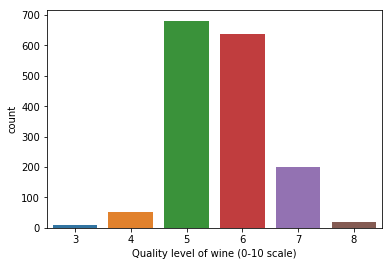



White


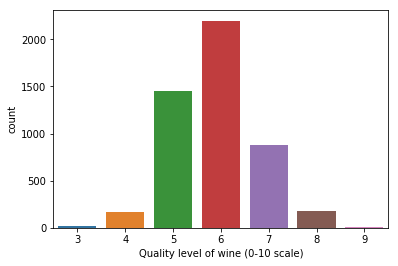

In [4]:
# ---------------- visualization  with countplots and factorplots----------------------------
def countplots(wine_set):
    wine_set["quality"] = pd.Categorical(wine_set["quality"])
    seaborn.countplot(x="quality", data=wine_set)
    plt.xlabel("Quality level of wine (0-10 scale)")
    plt.show()

call(countplots)


From the plot we see that the quality ranks of the white samples are on mean higher than those of the reds.

Lets further analyse with Factorplot.

Red


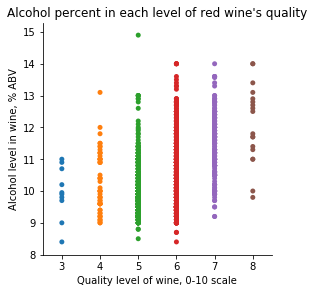



White


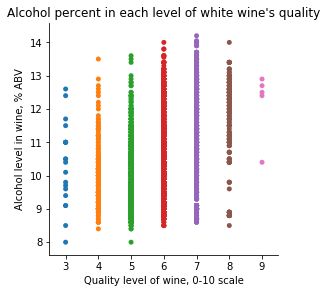

In [5]:
def factorplots(wine_set):
    seaborn.factorplot(x="quality", y="alcohol", data=wine_set, kind="strip")
    plt.xlabel("Quality level of wine, 0-10 scale")
    plt.ylabel("Alcohol level in wine, % ABV")
    if wine_set.equals(red):
        plt.title("Alcohol percent in each level of red wine's quality")
    else:
        plt.title("Alcohol percent in each level of white wine's quality")
    plt.show()

call(factorplots)

Above Plots show the alcohol levels of the wine samples in each quality rank.
We notice that there is a less strong but positive correlation between the alcohol level and the quality rank for the two wines. We find that higher the quality rank, more the alcohol level.

## 2. Data Visualization

Lets proceed to calculation of the correlation coefficient between the different variables and then plot it as a heat map so that we can easily see what happens.


Red


White


Red


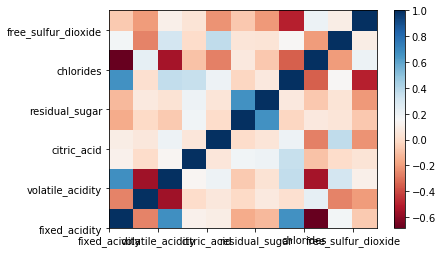



White


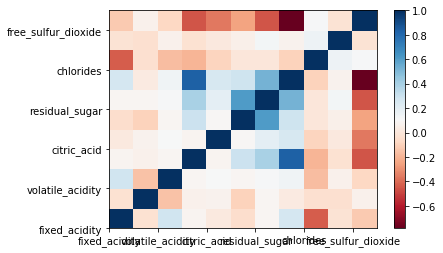

In [8]:

import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi

# ---- to remove all spaces from column names ---------
def remove_col_spaces(wine_set):
    wine_set.columns = [x.strip().replace(' ', '_') for x in wine_set.columns]
    return wine_set

call(remove_col_spaces)

# ----- covariance matrix ---------
def covmax(wine_set):
    cov_mat = wine_set.corr(method='pearson')
 
    fig = plt.figure().add_subplot(111)
    
    plt.pcolor(cov_mat, cmap='RdBu')
    plt.colorbar()
    fig.set_xticklabels(wine_set.columns)
    fig.set_yticklabels(wine_set.columns)
    plt.show()
    
call(covmax)

## --------- to add a column 'quality_mark'on our analysis----------
def add_categ_quality(wine_set):
    low = wine_set[wine_set['quality'] <= 5]
    medium = wine_set[(wine_set['quality'] == 6) | (wine_set['quality'] == 7)]
    high = wine_set[wine_set['quality'] > 7]

    low['quality_mark'] = 'low'
    medium['quality_mark'] = 'medium'
    high['quality_mark'] = 'high'

    frames = [low, medium, high]
    return(pd.concat(frames))

The heat map shows that there is a positive correlation between density and residual sugar and a strong negative correlation between density and alcohol content. It is also interesting to note that there is a positive correlation between the alcohol content and the quality of the wine.

Lets decrease our analysis to two variables (sulfur dioxide and the quality of the wine).

### a) Pearson Correlation :
After investigations on different forums that deal with the win quality dataset, I realized that it was better to add a new value that will contain the brand of wine quality: high if the quality rank is higher Or equal to 8, mean if the rank of quality is equal to 6 or 7 and weak if the rank of quality is less than or equal to 5. 


I explore the association between the density of the wine and the amount of residual sugar in the wine.

For this purpose, the Pearson correlation is used to calculate the coefficient of these variables (density is the most explanatory quantitative variable and residual sugar is the quantitative response variable) on each wine set separately


----------------Pearson Correlation------------------------
Red


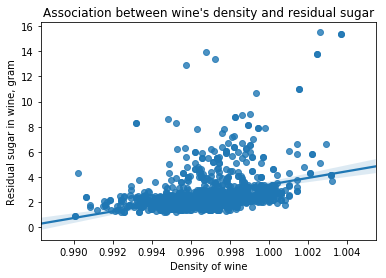

(0.3552833709833765, 9.013041728296711e-49)


White


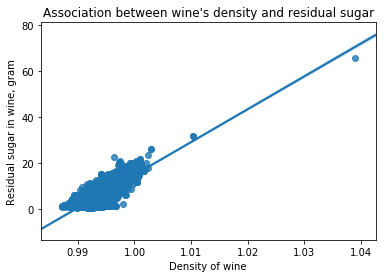

(0.8389664549045837, 0.0)




In [11]:
import scipy.stats
def pearson(wine_set):
    scat1 = seaborn.regplot(x="density", y="residual_sugar", fit_reg=True, data=wine_set)
    plt.xlabel("Density of wine")
    plt.ylabel("Residual sugar in wine, gram")
    plt.title("Association between wine's density and residual sugar")
    plt.show()

    print(scipy.stats.pearsonr(wine_set['density'], wine_set["residual_sugar"]))

print('----------------Pearson Correlation------------------------')
call(pearson)

* The coefficient for red wine is: r = 0.355, p-value = 9.0e-49.
* The coefficient for white wine: r = 0.839, p-value = 0.0.

Otherwise, the coefficients show that there is a positive linear relationship between these variables for both datasets. 

However, for white wine this relationship is stronger.

In addition, it can be assumed that the percentage variability in the amount of residual sugar in wine is explained by the variation in wine density which indicates that the red wine has a value equal to 12.6% and for wine White, a value equal to 70.4% (using RSquared or Determination Coefficient: 0.355² = 0.126 and 0.839² = 0.704 respectively). 

It is found that the quantity of sugar is very important in white wine. In other words, this means that the amount of sugar is strongly related to the density of the wine.

Then, we applied scatter-plots of these variables to check the linearity of the relationship.

Both plots show a positive but non-linear correlation.

## 3.Regression modeling
The association between the amount of volatile acidity in wine and the quality of the wine is explored by applying a simple linear regression model with an explanatory variable(the amount of volatile acidity)the association between the amount of volatile acidity in wine and the quality of the wine is explored by applying a simple linear regression model with an explanatory variable (the amount of volatile acidity). 

I apply it separately for the two sets of wine (red and white).
Scatter-plots reveal a negative association between the variables for the two wine datasets: the more volatile acidity increases, the lower the quality of the wine.

Before testing our linear regression model, the explanatory variable (volatile acidity) was centered by subtracting its mean from each observed value. It is advisable to notify that the average of the volatile acidity is different for each set of wine: for red wine it is 0.53 and for white wine 0.28.

The results of the regression modeling for red wine indicate that the model was constructed using 1599 observations, the RSquared is 0.153, F = 287.4 with p = 2.05e-59, otherwise it means that the Variables are significantly associated. The regression coefficients of the model are: intercept = 5.6360 and slope = -1.7614, which means that we can connect our variables by the formula:

Quality = 5.6360 - 1.7614 * volatile acidity.

The results of the regression modeling for white wine indicate that the model was constructed using 4898 observations, the RSquared is 0.038, F = 193.0 with p = 4.67e-43, otherwise it means that the variables are significantly Associated. 

The regression coefficients of the model are: interception = 5.8779 and slope = -1.7109, which means that we can connect our variables by the formula:
Quality = 5.8779 - 1.7109 * volatile acidity.

The relationship between the amount of volatile acidity and its quality is almost the same for both wines, although the average amount of volatile acidity in red wine is higher than that in white wine.

Here we analyze the association between the amount of sulfates and alcohol in the wine and the quality of the wine using logistic regression. To do this, I then coded the explanatory and response variables into binary categorical values. I proceed to the recoding using the following rules:

### Logistic Regression :

* Quality category: 0 - if the quality of a wine sample is 3, 4, 5 or 6. 1 - if 7, 8 or 9;
* Sulphate category: 0 - if the amount of sulphates in a wine sample is less than the average amount of sulphates in all samples, 1 - if greater;
* Categorical alcohol: 0 - if the amount of alcohol in a wine sample is less than the average amount of alcohol in all samples, 1 - if it is higher.

After recoding the variables, I model the logistic regression and calculate the confidence intervals for the explanatory variables. Tthis procedure is performed separately on both sets of wine.

The results of the logistic regression model for red wine indicate that the two explanatory variables are positively and significantly associated with the response variable (p-values = 0).

None of these variables have a confounding factor. It can be said that after adjusting for the sulphate variable, wine samples with an above average alcohol content are 9.26 times more likely to have a high quality index (> 7). Similarly, after adjusting for the alcohol variable, samples of wine with an above average sulfate content are 3.99 times more likely to have a high quality index (> = 7).

The results of the logistic regression model for white wine indicate that the two explanatory variables are positively and significantly associated with the response variable (p-sulfate value = 0.007, p-alcohol value = 0).

None of these variables is a confounding factor. It can be said that after adjusting for the sulphate variable, wine samples with a value greater than the average quantity of alcohol are 6.00 times more likely to have a high quality index (> = 7). 

Similarly, after adjusting for the alcohol variable, wine samples with an amount greater than the average quantity of sulphates are 1.22 times more likely to have a high quality index (> = 7).

Consequently, the final results show that for both wines, the sulphate and alcohol variables are positively associated with the quality variable. Moreover, for the two wines, the alcohol variable is stronger than the quality variable because it has a higher regression coefficient than the sulphate variable.

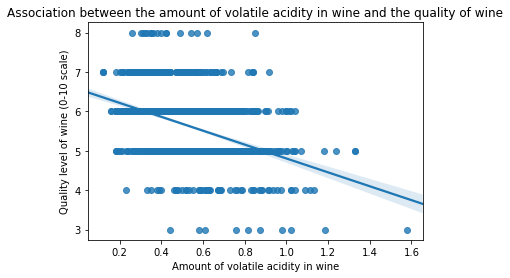

mean of the volatile acidity variable =  0.5278205128205128
mean of the volatile acidity variable after normalization =  3.443843778699673e-17

OLS regression model for the association between the amount of volatile acidity in wine and the quality of wine:
                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     287.4
Date:                Tue, 03 Jul 2018   Prob (F-statistic):           2.05e-59
Time:                        10:48:48   Log-Likelihood:                -1794.3
No. Observations:                1599   AIC:                             3593.
Df Residuals:                    1597   BIC:                             3603.
Df Model:                           1                                         
Covariance Type:            nonr

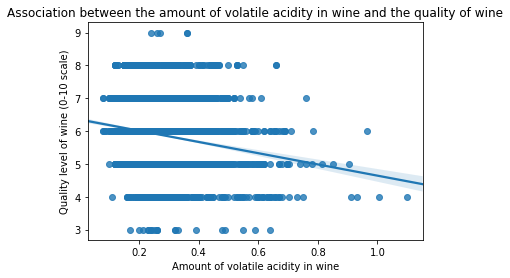

mean of the volatile acidity variable =  0.27824111882400976
mean of the volatile acidity variable after normalization =  4.4245719560398236e-17

OLS regression model for the association between the amount of volatile acidity in wine and the quality of wine:
                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     193.0
Date:                Tue, 03 Jul 2018   Prob (F-statistic):           4.67e-43
Time:                        10:48:49   Log-Likelihood:                -6260.0
No. Observations:                4898   AIC:                         1.252e+04
Df Residuals:                    4896   BIC:                         1.254e+04
Df Model:                           1                                         
Covariance Type:            no

In [2]:

import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
import numpy

red = pd.read_csv('winequality-red.csv', low_memory=False, sep=';')
white = pd.read_csv('winequality-white.csv', low_memory=False, sep=';')


def call(functionToCall):
    #print('Red')
    functionToCall(red)
    print('\n')

    #print('White')
    functionToCall(white)
    print('\n')


# ----- to remove all spaces from column names ---------
def remove_col_spaces(wine_set):
    wine_set.columns = [x.strip().replace(' ', '_') for x in wine_set.columns]
    return wine_set

call(remove_col_spaces)


# # ______________________________ Basics of Linear Regression_____________________________________
#
def basic_linear(wine_set):
    scat0 = seaborn.regplot(x="volatile_acidity", y="quality", fit_reg=True, data=wine_set)
    plt.xlabel("Amount of volatile acidity in wine")
    plt.ylabel("Quality level of wine (0-10 scale)")
    plt.title("Association between the amount of volatile acidity in wine and the quality of wine")
    plt.show()

    # ----------- centering the explanatory variable by subrtacting the mean
    f_acidity_mean = wine_set["volatile_acidity"].mean()
    print("mean of the volatile acidity variable = ", f_acidity_mean)
    wine_set["volatile_acidity"] = wine_set["volatile_acidity"] - f_acidity_mean
    print("mean of the volatile acidity variable after normalization = ", wine_set["volatile_acidity"].mean())

    print ("\nOLS regression model for the association between the amount of volatile acidity in wine and the quality of wine:")
    model1 = smf.ols(formula="quality ~ volatile_acidity", data=wine_set)
    results1 = model1.fit()
    print(results1.summary())


call(basic_linear)



# ____________________________ Logistic Regression _____________________

def log_regression(wine_set):
    # # examining the data before recoding
    # print(wine_set["sulphates"].describe())
    
    # recode quality into 2 groups: 0:{3,4,5,6}, 1:{7,8,9}
    recode = {3: 0, 4: 0, 5:0, 6:0, 7:1, 8:1, 9:1}
    wine_set['quality_c'] = wine_set['quality'].map(recode)

    # recode sulphates into 2 groups: 0: <= mean, 1: > mean
    def sulphates_to_cat(x):
       if x['sulphates'] <= wine_set['sulphates'].mean():
          return 0
       else:
          return 1
    wine_set['sulphates_c'] = wine_set.apply(lambda x: sulphates_to_cat(x), axis=1)

    # recode alcohol into 2 groups: 0: <= mean , 1: > mean
    def alcohol_to_cat(x):
       if x['alcohol'] <= wine_set['alcohol'].mean():
          return 0
       else:
          return 1
    wine_set['alcohol_c'] = wine_set.apply(lambda x: alcohol_to_cat(x), axis=1)
    # print(wine_set.head(10))

    # logistic regression for sulphates+alcohol -> quality
    print ("Logistic regression model for the association between wine's quality and sulphates&alcohol")
    model1 = smf.logit(formula="quality_c ~ sulphates_c + alcohol_c", data=wine_set)
    results1 = model1.fit()
    print(results1.summary())

    # odds ratios with 95% confidence intervals
    print("\nConfidence intervals")
    conf = results1.conf_int()
    conf['Odds ratio'] = results1.params
    conf.columns = ['Lower conf.int.', 'Upper conf.int.', 'Odds ratio']
    print(numpy.exp(conf))

call(log_regression)

### 4.Machine Learning :

**a) Decision Trees :**

In the last section of our study which is machine learning I begin the analysis by decision trees in order to test the nonlinear relations between a set of explanatory variables which are the quantity of residual sugar and alcohol in the wine and a response variable Binary and categorical coded upstream (0 - if the quality of a wine sample is 3, 4 or 5, 1 - if 6, 7, 8 or 9).
In this analysis, the criterion of entropy "goodness of division" was used to cultivate the tree and a cost complexity algorithm was used to carve the complete tree into a final subtree. A classification tree was applied for both datasets (red and white). In each series, 60% of the samples were used for training and 40% for the tests.
Badr Tajini – On Campus Paris – DSTI 2017










### 4.Machine Learning :

**a) Decision Trees :**

In this part of machine learning I begin the analysis by decision trees in order to test the nonlinear relations between a set of explanatory variables which are the quantity of residual sugar and alcohol in the wine and a response variable Binary and categorical coded upstream (0 - if the quality of a wine sample is 3, 4 or 5, 1 - if 6, 7, 8 or 9).

In this analysis, the criterion of entropy "goodness of division" was used to cultivate the tree and a cost complexity algorithm was used to carve the complete tree into a final subtree. A classification tree was applied for both datasets (red and white). In each series, 60% of the samples were used for training and 40% for the tests.


Import libraries and remove spaces:

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.grid_search import GridSearchCV
from sklearn import svm
import time

from sklearn.cross_validation import train_test_split
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import sklearn
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import matplotlib.pyplot as plt
import operator
from sklearn import preprocessing
from sklearn.linear_model import LassoLarsCV
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix




red = pd.read_csv('winequality-red.csv', low_memory=False, sep=';')
white = pd.read_csv('winequality-white.csv', low_memory=False, sep=';')


def call(functionToCall):
    print('Red')
    functionToCall(red)
    print('\n')

    print('White')
    functionToCall(white)
    print('\n')


# ----- to remove all spaces from column names ---------
def remove_col_spaces(wine_set):
    wine_set.columns = [x.strip().replace(' ', '_') for x in wine_set.columns]
    return wine_set

call(remove_col_spaces)

tic = time.clock()

c:\program files\python36-32\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
c:\program files\python36-32\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Red


White




Decision Tree:

In [4]:
def decis_tree(wine_set):
    # local variable to identify if the wine_set red or white
    w = wine_set


    # recode quality (response variable) into 2 groups: 0:{3,4,5}, 1:{6,7,8,9}
    recode = {3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 1}
    wine_set['quality_c'] = wine_set['quality'].map(recode)


    # split into training and testing sets
    predictors = wine_set[["residual_sugar", 'alcohol']]
    targets = wine_set.quality_c

    pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.4)

    # build model on training data
    classifier = DecisionTreeClassifier()
    classifier = classifier.fit(pred_train, tar_train)

    predictions = classifier.predict(pred_test)

    # print the confusion matrix and accuracy of the model
    print(sklearn.metrics.confusion_matrix(tar_test, predictions))
    print(sklearn.metrics.accuracy_score(tar_test, predictions))

    # export the tree for viewing
    if w.equals(red):
        export_graphviz(classifier, out_file="red_decision_tree.dot")
    else:
        export_graphviz(classifier, out_file="white_decision_tree.dot")

print('----------------Decision Tree------------------------')
call(decis_tree)

----------------Decision Tree------------------------
Red
[[200  98]
 [127 215]]
0.6484375


White
[[ 407  252]
 [ 299 1002]]
0.7188775510204082




The resulting tree precision for red wine is 0.65. The confusion matrix is:

[198,105]

[120,217]
The resulting tree accuracy for white wine is 0.72. The confusion matrix is:

[404,262]

[290,100]

At the end of our simulation, a very large volume of trees was obtained for examination. This may indicate that the selected variables are not suitable for the training of the appropriate trees or that the analysis of the trees is not suitable for these data.


### **b) KNN :**
A KNN Model was applied for both datasets (red and white). In each series, 60% of the samples were used for training and 40% for the tests.

In [6]:
def knn(wine_set):
    
    # recode quality (response variable) into 2 groups: 0:{3,4,5}, 1:{6,7,8,9}
    recode = {3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 1}
    wine_set['quality_c'] = wine_set['quality'].map(recode)

    # split into training and testing sets
    predictors = wine_set[["residual_sugar", 'alcohol']]
    targets = wine_set.quality_c

    pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.4)
    
    
    # build model on training data
    classifier = KNeighborsClassifier()
    classifier = classifier.fit(pred_train, tar_train)

    predictions = classifier.predict(pred_test)

    # print the confusion matrix and accuracy of the model
    print(sklearn.metrics.confusion_matrix(tar_test, predictions))
    print(sklearn.metrics.accuracy_score(tar_test, predictions))
    
    print('Score:', classifier.score(pred_test, tar_test))
    print('RMSE:', mean_squared_error(predictions, tar_test) ** 0.5)

    
call(knn)

Red
[[185 128]
 [ 89 238]]
0.6609375
Score: 0.6609375
RMSE: 0.5822907349426057


White
[[ 379  273]
 [ 267 1041]]
0.7244897959183674
Score: 0.7244897959183674
RMSE: 0.5248906591678238




The precision of our resulting model for red wine is 0.65. The confusion matrix is:
Red

[[202 100]

[ 89 249]]

Score: 0.6546875

The best precision of our resulting model for white wine is 0.70. The confusion matrix is:

White

[[ 336 320]

[ 264 1040]]

Score: 0.704081632653


### c) Naive Bayes :
Now, we use a Naive Bayes classifier to develop a classification model. Some characteristics show a significant correlation (based on the heat map).
The dataset for the classification is then prepared.
In each series, 60% of the samples were used for training and 40% for the tests.

Then we will train with Naive Bayes classifier and use the test to check the accuracy of the model. We can do this by creating a confusion matrix. We can also create a simple summary statistic to check to see what percentage of the test set finished off the diagonal.

In [7]:
def naive(wine_set):
   
    # recode quality (response variable) into 2 groups: 0:{3,4,5}, 1:{6,7,8,9}
    recode = {3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 1}
    wine_set['quality_c'] = wine_set['quality'].map(recode)

    # split into training and testing sets
    predictors = wine_set[["density", 'alcohol', 'sulphates', 'pH', 'volatile_acidity', 'chlorides', 'fixed_acidity',
                           'citric_acid', 'residual_sugar', 'free_sulfur_dioxide', 'total_sulfur_dioxide']]
    targets = wine_set.quality_c

    pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.4)
    

    classifier = GaussianNB()
    classifier.fit(pred_train, tar_train)
    predictionsG = classifier.predict(pred_test)
    # print the confusion matrix and accuracy of the model
    print(sklearn.metrics.confusion_matrix(tar_test, predictionsG))
    print(sklearn.metrics.accuracy_score(tar_test, predictionsG))
    print("Gaus " + str(classifier.score(pred_test, tar_test)))
    mse = mean_squared_error(predictionsG, tar_test)
    print(mse ** 0.5)

    classifierm = MultinomialNB()
    classifierm.fit(pred_train, tar_train)
    predictionsM = classifierm.predict(pred_test)
    # print the confusion matrix and accuracy of the model
    print(sklearn.metrics.confusion_matrix(tar_test, predictionsM))
    print(sklearn.metrics.accuracy_score(tar_test, predictionsM))
    print ("Multi " + str(classifierm.score(pred_test, tar_test)))
    mse = mean_squared_error(predictionsM, tar_test)
    print (mse ** 0.5)

    classifierb = BernoulliNB()
    classifierb.fit(pred_train, tar_train)
    predictionsB = classifierb.predict(pred_test)
    # print the confusion matrix and accuracy of the model
    print(sklearn.metrics.confusion_matrix(tar_test, predictionsB))
    print(sklearn.metrics.accuracy_score(tar_test, predictionsB))
    print ("Bernoulli " + str(classifierb.score(pred_test, tar_test)))
    mse = mean_squared_error(predictionsB, tar_test)
    print (mse ** 0.5)
    

call(naive)


Red
[[211  88]
 [ 90 251]]
0.721875
Gaus 0.721875
0.5273755777432246
[[133 166]
 [ 79 262]]
0.6171875
Multi 0.6171875
0.6187184335382291
[[ 33 266]
 [ 28 313]]
0.540625
Bernoulli 0.540625
0.677772085586298


White
[[ 352  311]
 [ 267 1030]]
0.7051020408163265
Gaus 0.7051020408163265
0.5430450802499489
[[ 258  405]
 [ 269 1028]]
0.6561224489795918
Multi 0.6561224489795918
0.5864107357649655
[[   5  658]
 [   5 1292]]
0.661734693877551
Bernoulli 0.661734693877551
0.5816057995949223






The best precision of our resulting model for red wine is 0.73. The confusion matrix is:

Red

[[230,88]

[83,239]]

Gaus 0.7328125

[[148,170]

[79,243]]

Multi 0.6109375

[[30,288]

[26,296]]

Bernoulli 0.5265625

The best precision of our resulting model for white wine is 0.71. The confusion matrix is:

White

[[388,295]

[272,100]]

Gaus 0.710714285714

[[284,399]

[262 1015]]

Multi 0.662755102041

[[4,679]

[4,1273]]

Bernoulli 0.651530612245


### d) Random Forests :
In this section, a random forests analysis is carried out to assess the importance of all explanatory variables in the prediction of wine quality.

The analysis was carried out for each wine set (red and white) separately. In each group, 60% of the sample was used for training and 40% for testing.

The analysis involves two steps. First, I create the random forests model with 25 trees and then look at the results. Second, 

I run random forests with different numbers of trees (1-100) to see the effect of the number on the accuracy of the prediction.

The results of the Random Forests model with 25 trees for red wine show that the prediction accuracy is 0.778 and alcohol is the most important predictor variable, followed by volatile acidity, sulphates and sulfur dioxide total

Random Forests results with 25 trees for white wine show that the prediction accuracy is 0.816 and alcohol is the most important predictor variable, followed by volatile acidity and density.

Random Forests training with a different number of trees (1-100) shows that after about 20 trees, subsequent growth in the number of trees adds little to the overall accuracy of the forest. The simulation was applied to the two sets of wine: red and white.

Red
confusion matrix:
 [[220  85]
 [ 54 281]]

accuracy: 0.7828125
importance of predictors:
[('alcohol', 0.1818241256088301), ('volatile_acidity', 0.12774818289010098), ('sulphates', 0.11250318918584683), ('total_sulfur_dioxide', 0.10042670207472837), ('chlorides', 0.0743783033942358), ('density', 0.07335661509397987), ('fixed_acidity', 0.07328874728938906), ('pH', 0.06551647740853461), ('residual_sugar', 0.06526731159879244), ('free_sulfur_dioxide', 0.0632837678955073), ('citric_acid', 0.062406577560054674)]


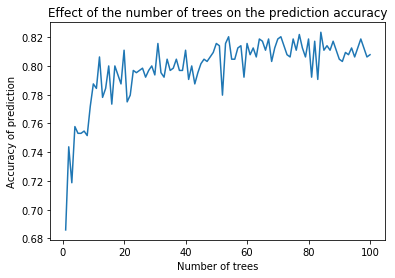

[0.6859375, 0.74375, 0.71875, 0.7578125, 0.753125, 0.753125, 0.7546875, 0.7515625, 0.771875, 0.7875, 0.784375, 0.80625, 0.778125, 0.784375, 0.8, 0.7734375, 0.8, 0.79375, 0.7875, 0.8109375, 0.775, 0.7796875, 0.796875, 0.7953125, 0.796875, 0.7984375, 0.7921875, 0.796875, 0.8, 0.79375, 0.815625, 0.7953125, 0.7921875, 0.8046875, 0.796875, 0.7984375, 0.8046875, 0.796875, 0.796875, 0.8109375, 0.790625, 0.8, 0.7875, 0.7953125, 0.8015625, 0.8046875, 0.803125, 0.80625, 0.809375, 0.815625, 0.8140625, 0.7796875, 0.815625, 0.8203125, 0.8046875, 0.8046875, 0.8125, 0.8140625, 0.7921875, 0.815625, 0.8078125, 0.8125, 0.80625, 0.81875, 0.8171875, 0.8109375, 0.81875, 0.803125, 0.8125, 0.81875, 0.8203125, 0.8140625, 0.8078125, 0.80625, 0.81875, 0.8109375, 0.821875, 0.8125, 0.80625, 0.81875, 0.7921875, 0.8171875, 0.790625, 0.8234375, 0.8109375, 0.8140625, 0.8109375, 0.8171875, 0.8109375, 0.8046875, 0.803125, 0.809375, 0.8078125, 0.8125, 0.80625, 0.8125, 0.81875, 0.8125, 0.80625, 0.8078125]


White
confusi

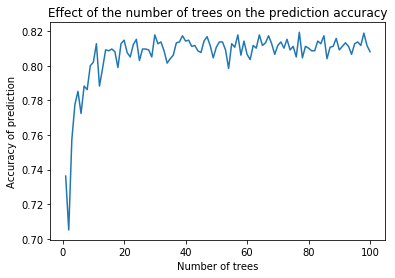

[0.7362244897959184, 0.7051020408163265, 0.7571428571428571, 0.7775510204081633, 0.7852040816326531, 0.7724489795918368, 0.7882653061224489, 0.7862244897959184, 0.8, 0.8020408163265306, 0.8127551020408164, 0.7882653061224489, 0.798469387755102, 0.8091836734693878, 0.8086734693877551, 0.8096938775510204, 0.8081632653061225, 0.7989795918367347, 0.8127551020408164, 0.814795918367347, 0.8076530612244898, 0.8051020408163265, 0.8122448979591836, 0.8153061224489796, 0.8030612244897959, 0.8096938775510204, 0.8096938775510204, 0.8091836734693878, 0.8051020408163265, 0.8178571428571428, 0.8127551020408164, 0.8137755102040817, 0.8086734693877551, 0.801530612244898, 0.8040816326530612, 0.8061224489795918, 0.813265306122449, 0.8137755102040817, 0.8173469387755102, 0.8142857142857143, 0.814795918367347, 0.8112244897959183, 0.811734693877551, 0.8086734693877551, 0.8076530612244898, 0.8142857142857143, 0.8168367346938775, 0.811734693877551, 0.8045918367346939, 0.8107142857142857, 0.8137755102040817, 0

In [8]:
def random_forests(wine_set):
    # recode quality (response variable) into 2 groups: 0:{3,4,5}, 1:{6,7,8,9}
    recode = {3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 1}
    wine_set['quality_c'] = wine_set['quality'].map(recode)

    # split into training and testing sets
    predictors = wine_set[["density", 'alcohol', 'sulphates', 'pH', 'volatile_acidity', 'chlorides', 'fixed_acidity',
                           'citric_acid', 'residual_sugar', 'free_sulfur_dioxide', 'total_sulfur_dioxide']]

    targets = wine_set.quality_c

    pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.4)

    # build model on training data#
    classifier = RandomForestClassifier(n_estimators=25)
    classifier = classifier.fit(pred_train, tar_train)

    predictions = classifier.predict(pred_test)
    # print the confusion matrix and accuracy of the model
    print('confusion matrix:\n', sklearn.metrics.confusion_matrix(tar_test, predictions))
    print('\naccuracy:', sklearn.metrics.accuracy_score(tar_test, predictions))

    # to display the relative importance of each predictive variable
    model = ExtraTreesClassifier()
    model.fit(pred_train, tar_train)

    print('importance of predictors:')
    dct = dict()
    for c in range(len(predictors.columns)):
        dct[predictors.columns[c]] = model.feature_importances_[c]
    print(sorted(dct.items(), key=operator.itemgetter(1), reverse=True))

    # run different numbers of trees to see the effect of the number on the accuracy of the prediction
    n = 100
    accuracy = [0]*n

    for i in range(n):
        classifier = RandomForestClassifier(n_estimators=i+1)
        classifier = classifier.fit(pred_train, tar_train)
        predictions = classifier.predict(pred_test)
        accuracy[i] = sklearn.metrics.accuracy_score(tar_test, predictions)

    plt.plot(range(1, n+1), accuracy)
    plt.xlabel("Number of trees")
    plt.ylabel("Accuracy of prediction")
    plt.title("Effect of the number of trees on the prediction accuracy")
    plt.show()

    print(accuracy)

call(random_forests)


### e) Lasso regression
A lasso regression analysis was performed to identify a subset of wine characteristics (predictive variables) that are best for predicting wine quality (quantitative response variable). 

All characteristics of the wine were included as predictors; They are quantitative and have been standardized to have an average of zero and one standard deviation of one.

The data were divided into a training set (70% of observations) and one test (30%). 

The lowest angle regression algorithm with cross-validation k = 10 times was used to estimate the regression model of the lasso in the training set and the model was validated using l Test set. Cross-validation at each step was used to identify the best subset of predictive variables.

All predictive variables were not selected in the selected models. For red wine, citric acid, fixed acidity and free sulfur dioxide have zero coefficients and will not be taken into account in the prediction. 

Red
Predictors and their regression coefficients:
density : -0.020095347815243417
alcohol : 0.29312748593624177
sulphates : 0.1355171786869132
pH : -0.027802563013414647
volatile_acidity : -0.19031297553741983
chlorides : -0.08393917245157399
fixed_acidity : 0.0
citric_acid : 0.0
residual_sugar : 0.01752069148896642
free_sulfur_dioxide : 0.0
total_sulfur_dioxide : -0.07928212046868179

Alpha: 0.0002479994751891389


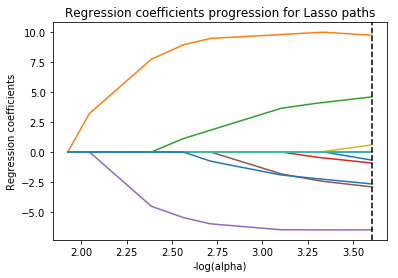

c:\program files\python36-32\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log10
c:\program files\python36-32\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function cv_mse_path_ is deprecated; Attribute ``cv_mse_path_`` is deprecated in 0.18 and will be removed in 0.20. Use ``mse_path_`` instead
  warnings.warn(msg, category=DeprecationWarning)
c:\program files\python36-32\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function cv_mse_path_ is deprecated; Attribute ``cv_mse_path_`` is deprecated in 0.18 and will be removed in 0.20. Use ``mse_path_`` instead
  warnings.warn(msg, category=DeprecationWarning)


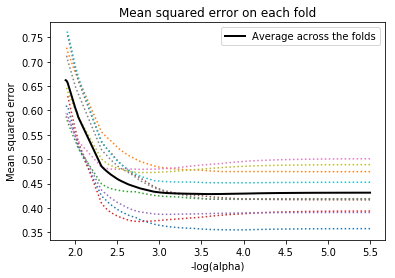


Mean squared error for training data: 0.42038759089201144
Mean squared error for test data: 0.42181400455172546

R-square for training data: 0.3629641127620281
R-square for test data: 0.3328073741712605


White
Predictors and their regression coefficients:
density : -0.2493951114322612
alcohol : 0.3303025577975226
sulphates : 0.06748773072115306
pH : 0.057857467498299
volatile_acidity : -0.19002207866367513
chlorides : -0.004067080798942425
fixed_acidity : 0.0
citric_acid : 0.0
residual_sugar : 0.2949812850759405
free_sulfur_dioxide : 0.05520792036549386
total_sulfur_dioxide : -0.013006735328912339

Alpha: 9.211601493058603e-05


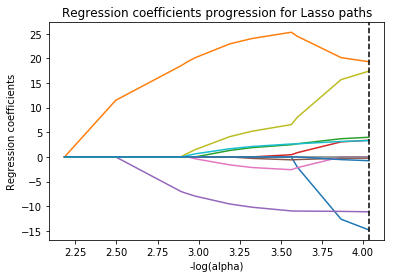

c:\program files\python36-32\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function cv_mse_path_ is deprecated; Attribute ``cv_mse_path_`` is deprecated in 0.18 and will be removed in 0.20. Use ``mse_path_`` instead
  warnings.warn(msg, category=DeprecationWarning)
c:\program files\python36-32\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function cv_mse_path_ is deprecated; Attribute ``cv_mse_path_`` is deprecated in 0.18 and will be removed in 0.20. Use ``mse_path_`` instead
  warnings.warn(msg, category=DeprecationWarning)


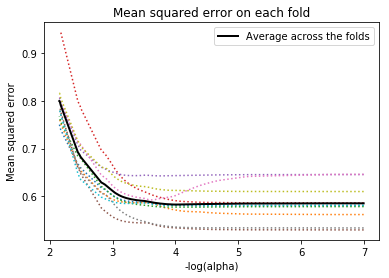


Mean squared error for training data: 0.576391742443699
Mean squared error for test data: 0.5387294766360478

R-square for training data: 0.27849515947040204
R-square for test data: 0.28165901553327566




In [9]:

# ________________________________Lasso Regression__________________________________
def lasso_regr(wine_set):

    pred = wine_set[["density", 'alcohol', 'sulphates', 'pH', 'volatile_acidity', 'chlorides', 'fixed_acidity',
                    'citric_acid', 'residual_sugar', 'free_sulfur_dioxide', 'total_sulfur_dioxide']]
    predictors = pred.copy()
    targets = wine_set.quality

    # standardize predictors to have mean=0 and sd=1
    predictors = pd.DataFrame(preprocessing.scale(predictors))
    predictors.columns = pred.columns
    # print(predictors.head())

    # split into training and testing sets
    pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.3, random_state=123)

    # specify the lasso regression model
    model = LassoLarsCV(cv=10, precompute=False).fit(pred_train, tar_train)

    print('Predictors and their regression coefficients:')
    d = dict(zip(predictors.columns, model.coef_))
    for k in d:
        print(k, ':', d[k])

    # plot coefficient progression
    m_log_alphas = -np.log10(model.alphas_)
    # ax = plt.gca()
    plt.plot(m_log_alphas, model.coef_path_.T)
    print('\nAlpha:', model.alpha_)
    plt.axvline(-np.log10(model.alpha_), linestyle="dashed", color='k', label='alpha CV')
    plt.ylabel("Regression coefficients")
    plt.xlabel("-log(alpha)")
    plt.title('Regression coefficients progression for Lasso paths')
    plt.show()

    # plot mean squared error for each fold
    m_log_alphascv = -np.log10(model.cv_alphas_)
    plt.plot(m_log_alphascv, model.cv_mse_path_, ':')
    plt.plot(m_log_alphascv, model.cv_mse_path_.mean(axis=-1), 'k', label='Average across the folds', linewidth=2)
    plt.legend()
    plt.xlabel('-log(alpha)')
    plt.ylabel('Mean squared error')
    plt.title('Mean squared error on each fold')
    plt.show()

    # Mean squared error from training and test data
    train_error = mean_squared_error(tar_train, model.predict(pred_train))
    test_error = mean_squared_error(tar_test, model.predict(pred_test))
    print('\nMean squared error for training data:', train_error)
    print('Mean squared error for test data:', test_error)

    rsquared_train = model.score(pred_train, tar_train)
    rsquared_test = model.score(pred_test, tar_test)
    print('\nR-square for training data:', rsquared_train)
    print('R-square for test data:', rsquared_test)
#
call(lasso_regr)


The results of the training indicate that the variables alcohol, volatile acidity and sulphates are the most strongly associated with the quality of the wine and, consequently, the most influential for the prediction. Thus, the mean squared error and RSquared values prove that the model is very vigorous to test new examples. The predictors represent 33% of the variance of the target variable.

For white wine, citric acid and acidity variables have zero coefficients and will not be taken into account in the prediction. 
The results of the training indicate that the variables alcohol, residual sugar, density and volatile acidity are most strongly associated with the quality of the wine and therefore the most influential for the prediction. Thus, the mean squared error and RSquared values prove that the model is very vigorous to test new examples. 

The predictors represent 28% of the variance of the target variable.

### f) K-Means Cluster Analysis

K-means analysis was carried out to identify the underlying subgroups of wine samples according to their characteristics (quantitative grouping variables): density, alcohol, sulphates, pH, volatile acidity, chlorides, acidity Fixed, citric acid, residual sugar, free sulfur dioxide, and total sulfur dioxide. The analysis was carried out for each wine set (red and
white) separately. 
All variables were normalized to have an average of 0 and a standard deviation of 1.
The data were randomly distributed in a training set (70%) and a test (30% of the observations). 

A series of k-means cluster analysis was conducted on the training set specifying k = 1-9 clusters, using the Euclidean distance. 
The mean distance between the observations and the cluster centroids was plotted for each of the nine cluster solutions in an elbow curve to provide a guide for choosing the cluster number to interpret.

The elbow curves for both datasets were inconclusive. To choose the best solution, discriminating canonical analyzes were performed for each solution.

The canonical discriminant analysis reduces the 11 clustering variables to 2 canonical variables which represent the majority of the variance in the clustering variables. 

After mapping the canonical variables for each cluster solution 1-9, the 2-group solution was chosen as the one that divides the data in the best way. 


----------------K-Means Cluster Analysis------------------------
Red
Average distance from observations to the cluster centroids for 1-9 clusters:
[3.0585488274384636, 2.72878716094586, 2.539894135016115, 2.4461126065066994, 2.3126471745454587, 2.255450485763202, 2.1658585994443884, 2.1175822640329134, 2.0689504435650057]


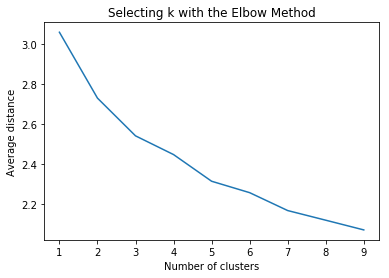

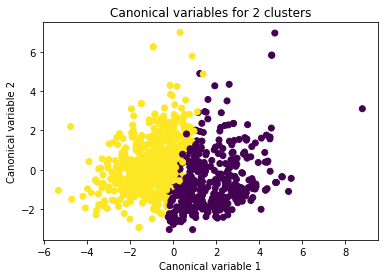


Counts of observations per each cluster:
1    706
0    413
Name: cluster, dtype: int64

Clustering variable means by cluster:
              index   density   alcohol  sulphates        pH  \
cluster                                                        
0        703.440678  0.555810  0.151918   0.582051 -0.712089   
1        843.820113 -0.301767 -0.131174  -0.324514  0.357958   

         volatile_acidity  chlorides  fixed_acidity  citric_acid  \
cluster                                                            
0               -0.671593   0.294584       0.949144     0.994521   
1                0.348789  -0.153544      -0.519408    -0.556554   

         residual_sugar  free_sulfur_dioxide  total_sulfur_dioxide  
cluster                                                             
0              0.214773            -0.218085             -0.199256  
1             -0.118829             0.190626              0.160390  
                            OLS Regression Results                 

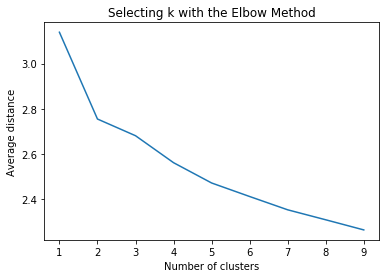

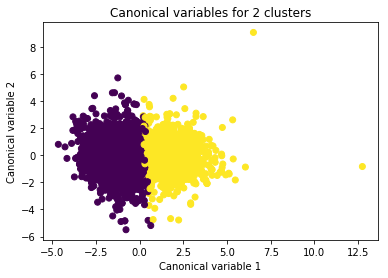


Counts of observations per each cluster:
0    2053
1    1375
Name: cluster, dtype: int64

Clustering variable means by cluster:
               index   density   alcohol  sulphates        pH  \
cluster                                                         
0        2592.485631 -0.633504  0.520603  -0.031867  0.135911   
1        2255.499636  0.954743 -0.805293   0.054112 -0.225075   

         volatile_acidity  chlorides  fixed_acidity  citric_acid  \
cluster                                                            
0               -0.020922  -0.259639      -0.125141    -0.158296   
1                0.063166   0.424997       0.180630     0.258116   

         residual_sugar  free_sulfur_dioxide  total_sulfur_dioxide  
cluster                                                             
0             -0.565703            -0.393001             -0.507767  
1              0.848300             0.602841              0.752044  
                            OLS Regression Results           

In [11]:
def k_means(wine_set):

    # standardize predictors to have mean=0 and sd=1
    pred = wine_set[["density", 'alcohol', 'sulphates', 'pH', 'volatile_acidity', 'chlorides', 'fixed_acidity',
                    'citric_acid', 'residual_sugar', 'free_sulfur_dioxide', 'total_sulfur_dioxide']]
    clustervar = pred.copy()

    clustervar = pd.DataFrame(preprocessing.scale(clustervar))
    clustervar.columns = pred.columns

    # split into training and testing sets
    clus_train, clus_test = train_test_split(clustervar, test_size=.3, random_state=123)
    # print(clus_train.shape)

    # _________________k-means cluster analysis for 1-9 clusters
    clusters = range(1, 10)
    meandist = []

    for k in clusters:
        # print(k)
        model = KMeans(n_clusters=k)
        model.fit(clus_train)
        # clusassign = model.predict(clus_train)
        meandist.append(sum(np.min(cdist(clus_train, model.cluster_centers_, 'euclidean'), axis=1))/clus_train.shape[0])

    print('Average distance from observations to the cluster centroids for 1-9 clusters:')
    print(meandist)

    # plot average distance from observations to the cluster centroid
    # to use the Elbow Method to identify number of clusters to choose
    plt.plot(clusters, meandist)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average distance')
    plt.title('Selecting k with the Elbow Method')
    plt.show()


    # ________ 2-cluster solution proven to be the best
    model2 = KMeans(n_clusters=2)
    model2.fit(clus_train)
    # plot clusters
    pca_2 = PCA(2)
    plot_columns = pca_2.fit_transform(clus_train)
    plt.scatter(x=plot_columns[:, 0], y=plot_columns[:, 1], c=model2.labels_)
    plt.xlabel('Canonical variable 1')
    plt.ylabel('Canonical variable 2')
    plt.title('Canonical variables for 2 clusters')
    plt.show()

    # __________merge cluster assignment with clustering variables to examine cluster variable means by cluster

    # create a unique identifier variable from the index for the cluster training data
    # to merge with the cluster assignment variable

    clus_train.reset_index(level=0, inplace=True)
    # create a list that has the new index variable
    cluslist = list(clus_train['index'])
    # print(cluslist)
    # create a list of cluster assignments
    labels = list(model2.labels_)
    # combine index variable list with cluster assignment list into a dictionary
    newlist = dict(zip(cluslist, labels))
    # convert newlist dictionary to a dataframe
    newclus = pd.DataFrame.from_dict(newlist, orient='index')
    # rename the cluster assignment column
    newclus.columns = ['cluster']
    # create a unique identifier variable from the index for the cluster assignment dataframe
    # to merge with cluster training data
    newclus.reset_index(level=0, inplace=True)
    # merge the cluster assignment dataframe with the cluster training variable dataframe by the index variable
    merged_train = pd.merge(clus_train, newclus, on='index')
    # print(merged_train.head(n=100))
    print('\nCounts of observations per each cluster:')
    print(merged_train.cluster.value_counts())

    # calculate clustering variable means by cluster
    clustergrp = merged_train.groupby('cluster').mean()
    print('\nClustering variable means by cluster:')
    print(clustergrp)

    # _________validate clusters in training data by examining cluster differences
    #               in wine quality (validation variable) using ANOVA_____________
    # merge wine quality with clustering variables and cluster assignment data
    qual = wine_set['quality']
    # split quality data into train and test sets
    qual_train, qual_test = train_test_split(qual, test_size=.3, random_state=123)
    qual_train1 = pd.DataFrame(qual_train)
    qual_train1.reset_index(level=0, inplace=True)
    merged_train_all = pd.merge(qual_train1, merged_train, on='index')
    sub1 = merged_train_all[['quality', 'cluster']]

    mod = smf.ols(formula='quality ~ C(cluster)', data=sub1).fit()
    print(mod.summary())

    print('\nMeans for wine quality by cluster:')
    print(sub1.groupby('cluster').mean())
    print('\nStandard deviations for wine quality by cluster:')
    print(sub1.groupby('cluster').std())

    # perform test (using Tukey's Honestly Significant Difference Test)
    mc1 = multi.MultiComparison(sub1['quality'], sub1['cluster'])
    res1 = mc1.tukeyhsd()
    print(res1.summary())

print('----------------K-Means Cluster Analysis------------------------')
call(k_means)

#------------------time-consuming for the test--------------------
toc = time.clock()
print('time : ', (toc - tic))


For white wine, observations in clusters are densely compressed with relatively low cluster variances and clusters do not overlap with each other. 

For red wine, the observations in each of the two groups have a greater spread in the cluster variance, but the clusters do not overlap with each other.

For red wine, the mean of the clustering variables show that the values of the first group samples have a higher mean pH, volatile acidity, free sulfur dioxide and total sulfur dioxide than the samples of the second group. The average values of all other cluster variables in the first cluster are lower than in the second cluster.

For white wine, the averages of the grouping variables show that the values of the samples of the first group have an average of the values of alcohol and pH higher than the samples of the second group. 

The average values of all other cluster variables in the first cluster are lower than in the second cluster.






**In order to validate the clusters, an Analysis of Variance (ANOVA) was carried out to test the significant differences between the clusters on the quality of the wine**